In [1]:
# set path
rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = '/Users/rj/soft/sire/v2.1/sad/Emit_IBS_Time/'
os.chdir(workdir)
import scipy;
from scipy.integrate import quad

In [2]:
# stopping power calculated by NIST data sheet
dat0 = np.loadtxt('pos_bpm.dat')
posbpm, bpmh, bpmv = transpose(dat0)

dat0 = np.loadtxt('DR_twiss_orbit.dat')
pos, betx, bety, ex, ey, dx, dy = transpose(dat0)

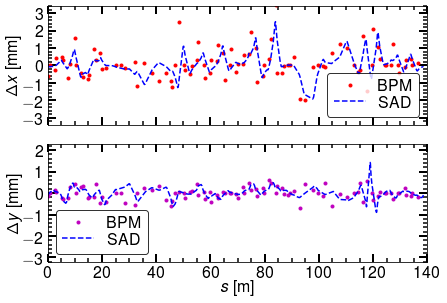

In [3]:
# 0.043 is because the difference between M in SAD deck and bpm position
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (6.5, 4.5))
fig.subplots_adjust(hspace=0)
axs[0].plot(posbpm+0.043, bpmh*1e-3, 'ro', markersize=3, label = "BPM")
axs[0].plot(pos, dx*1e3, 'b--', label = "SAD")
axs[0].set_ylim(-3.4, 3.4)
axs[0].set_yticks(np.arange(-3, 3.2))
axs[0].set_ylabel(r'$\Delta x$ [mm]', fontdict=font)
axs[0].legend(loc = 'best', fontsize=16, frameon=True, edgecolor = 'k')

axs[1].plot(posbpm+0.043, bpmv*1e-3, 'mo', markersize=3, label = "BPM")
axs[1].plot(pos, dy*1e3, 'b--', label = "SAD")
axs[1].set_ylim(-3.2, 2.3)
axs[1].set_yticks(np.arange(-3, 2.2))
axs[1].set_xlabel(r'$s$ [m]', fontdict=font)
axs[1].set_ylabel(r'$\Delta y$ [mm]', fontdict=font)
axs[1].legend(loc = 'best', fontsize=16, frameon=True, edgecolor = 'k')
axs[1].set_xlim(0, 140)

fig.tight_layout()
plt.show()
fig.savefig('DR_Orbit_bump_20171204.pdf')

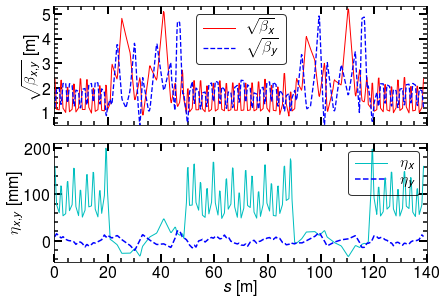

In [4]:
fig, axs = plt.subplots(2, 1, sharex = True, figsize = (6.5, 4.5))
fig.subplots_adjust(hspace=0)
axs[0].plot(pos, np.sqrt(betx), 'r-', linewidth = 1., label = r"$\sqrt{\beta_x}$")
axs[0].plot(pos, np.sqrt(bety), 'b--', linewidth = 1.3, label = r"$\sqrt{\beta_y}$")
axs[0].set_ylim(0.5, 5.3)
axs[0].set_yticks(np.arange(1, 5.1))
axs[0].set_ylabel(r'$\sqrt{\beta_{x,y}}$ [m]', fontdict=font)
axs[0].legend(loc = 'best', fontsize=16, frameon=True, edgecolor = 'k', facecolor = 'none')

axs[1].plot(pos, ex*1000, 'c-', linewidth = 1., label = r"$\eta_x$")
axs[1].plot(pos, ey*1000, 'b--', linewidth = 1.5, label = r"$\eta_y$")
# axs[1].set_ylim(-3.2, 2.3)
# axs[1].set_yticks(np.arange(-3, 2.2))
axs[1].set_xlabel(r'$s$ [m]', fontdict=font)
axs[1].set_ylabel(r'$\eta_{x,y}$ [mm]', fontdict=font)
axs[1].legend(loc = 'upper right', fontsize=16, frameon=True, edgecolor = 'k', facecolor = 'none')
axs[1].set_xlim(0, 140)

fig.tight_layout()
plt.show()
fig.savefig('DR_Twiss_OrbitBump_20171204.pdf')

In [5]:
cir = 138.56
c0 = 2.99792458e8
T0 = cir/c0
step_turn = 100

emitx_nom = 1.2e-9

dat0 = loadtxt('RES_Growth_Rates_start-end.dat')
turn_inj, emitx_inj, emity_inj, emits_inj, nul0, nul1, nul2 = transpose(dat0)

dat0 = loadtxt('emit_IBS1e9.dat')
mincoup_1e9, emitx_1e9, emity_1e9, emits_1e9, sigz_1e9, sigp_1e9 = transpose(dat0)
emity_1e9 = emitx_nom*mincoup_1e9

dat0 = loadtxt('emit_IBS3e9.dat')
mincoup_3e9, emitx_3e9, emity_3e9, emits_3e9, sigz_3e9, sigp_3e9 = transpose(dat0)
emity_3e9 = emitx_nom*mincoup_3e9

dat0 = loadtxt('emit_IBS6e9.dat')
mincoup_6e9, emitx_6e9, emity_6e9, emits_6e9, sigz_6e9, sigp_6e9 = transpose(dat0)
emity_6e9 = emitx_nom*mincoup_6e9

dat0 = loadtxt('emit_IBS8e9.dat')
mincoup_8e9, emitx_8e9, emity_8e9, emits_8e9, sigz_8e9, sigp_8e9 = transpose(dat0)
emity_8e9 = emitx_nom*mincoup_8e9

In [6]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [47]:
t_store = turn_inj*T0

sigp_IBS_1e9 = []
emitx_IBS_1e9 = []
emity_IBS_1e9 = []
for i in range(len(turn_inj)):
    if emity_inj[i]>max(emity_1e9):
        sigp_IBS_1e9 = np.append(sigp_IBS_1e9, sqrt(emits_inj[i]/2))
    else:
        emity_temp = find_nearest(emity_1e9, emity_inj[i])
        # print('emity_temp = %12.6e'%emity_temp)       
        index_temp = np.where(emity_1e9 == emity_temp)[0][0] # position of the nearest emity
        if sqrt(emits_inj[i]/2)>sigp_1e9[index_temp]:
            sigp_IBS_1e9 = np.append(sigp_IBS_1e9, sqrt(emits_inj[i]/2))      
        else:
            sigp_IBS_1e9 = np.append(sigp_IBS_1e9, sigp_1e9[index_temp])   
            
    if emity_inj[i]>max(emity_1e9):
        emitx_IBS_1e9 = np.append(emitx_IBS_1e9, emitx_inj[i]) 
        emity_IBS_1e9 = np.append(emity_IBS_1e9, emity_inj[i])         
    else:
        emity_temp = find_nearest(emity_1e9, emity_inj[i])
        index_temp = np.where(emity_1e9 == emity_temp)[0][0] # position of the nearest emity
        emitx_IBS_1e9 = np.append(emitx_IBS_1e9, emitx_1e9[index_temp])
        emity_IBS_1e9 = np.append(emity_IBS_1e9, emity_1e9[index_temp])        
        
sigp_IBS_3e9 = []
emitx_IBS_3e9 = []
emity_IBS_3e9 = []
for i in range(len(turn_inj)):
    if emity_inj[i]>max(emity_3e9):
        sigp_IBS_3e9 = np.append(sigp_IBS_3e9, sqrt(emits_inj[i]/2))
    else:
        emity_temp = find_nearest(emity_3e9, emity_inj[i])
        # print('emity_temp = %12.6e'%emity_temp)       
        index_temp = np.where(emity_3e9 == emity_temp)[0][0] # position of the nearest emity
        if sqrt(emits_inj[i]/2)>sigp_3e9[index_temp]:
            sigp_IBS_3e9 = np.append(sigp_IBS_3e9, sqrt(emits_inj[i]/2))      
        else:
            sigp_IBS_3e9 = np.append(sigp_IBS_3e9, sigp_3e9[index_temp])        

    if emity_inj[i]>max(emity_3e9):
        emitx_IBS_3e9 = np.append(emitx_IBS_3e9, emitx_inj[i]) 
        emity_IBS_3e9 = np.append(emity_IBS_3e9, emity_inj[i])         
    else:
        emity_temp = find_nearest(emity_3e9, emity_inj[i])
        index_temp = np.where(emity_3e9 == emity_temp)[0][0] # position of the nearest emity
        emitx_IBS_3e9 = np.append(emitx_IBS_3e9, emitx_3e9[index_temp])
        emity_IBS_3e9 = np.append(emity_IBS_3e9, emity_3e9[index_temp])  
        
sigp_IBS_6e9 = []
emitx_IBS_6e9 = []
emity_IBS_6e9 = []
for i in range(len(turn_inj)):
    if emity_inj[i]>max(emity_6e9):
        sigp_IBS_6e9 = np.append(sigp_IBS_6e9, sqrt(emits_inj[i]/2))
    else:
        emity_temp = find_nearest(emity_6e9, emity_inj[i])
        # print('emity_temp = %12.6e'%emity_temp)       
        index_temp = np.where(emity_6e9 == emity_temp)[0][0] # position of the nearest emity
        if sqrt(emits_inj[i]/2)>sigp_6e9[index_temp]:
            sigp_IBS_6e9 = np.append(sigp_IBS_6e9, sqrt(emits_inj[i]/2))      
        else:
            sigp_IBS_6e9 = np.append(sigp_IBS_6e9, sigp_6e9[index_temp])    

    if emity_inj[i]>max(emity_6e9):
        emitx_IBS_6e9 = np.append(emitx_IBS_6e9, emitx_inj[i]) 
        emity_IBS_6e9 = np.append(emity_IBS_6e9, emity_inj[i])         
    else:
        emity_temp = find_nearest(emity_6e9, emity_inj[i])
        index_temp = np.where(emity_6e9 == emity_temp)[0][0] # position of the nearest emity
        emitx_IBS_6e9 = np.append(emitx_IBS_6e9, emitx_6e9[index_temp])
        emity_IBS_6e9 = np.append(emity_IBS_6e9, emity_6e9[index_temp])    
        
sigp_IBS_8e9 = []
emitx_IBS_8e9 = []
emity_IBS_8e9 = []
for i in range(len(turn_inj)):
    if emity_inj[i]>max(emity_8e9):
        sigp_IBS_8e9 = np.append(sigp_IBS_8e9, sqrt(emits_inj[i]/2))
    else:
        emity_temp = find_nearest(emity_8e9, emity_inj[i])
        # print('emity_temp = %12.6e'%emity_temp)       
        index_temp = np.where(emity_8e9 == emity_temp)[0][0] # position of the nearest emity
        if sqrt(emits_inj[i]/2)>sigp_8e9[index_temp]:
            sigp_IBS_8e9 = np.append(sigp_IBS_8e9, sqrt(emits_inj[i]/2))  

        else:
            sigp_IBS_8e9 = np.append(sigp_IBS_8e9, sigp_8e9[index_temp])
            
    if emity_inj[i]>max(emity_8e9):
        emitx_IBS_8e9 = np.append(emitx_IBS_8e9, emitx_inj[i]) 
        emity_IBS_8e9 = np.append(emity_IBS_8e9, emity_inj[i])         
    else:
        emity_temp = find_nearest(emity_8e9, emity_inj[i])
        index_temp = np.where(emity_8e9 == emity_temp)[0][0] # position of the nearest emity
        emitx_IBS_8e9 = np.append(emitx_IBS_8e9, emitx_8e9[index_temp])
        emity_IBS_8e9 = np.append(emity_IBS_8e9, emity_8e9[index_temp])                

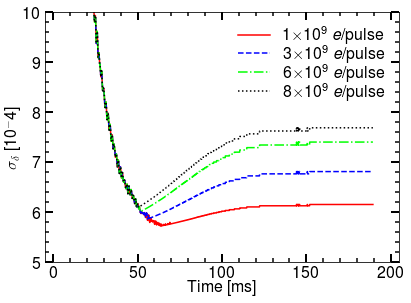

In [21]:
fig = plt.figure()
plt.plot(t_store*1e3, sigp_IBS_1e9*1e4, label = r'1$\times10^9$ $e$/pulse')
plt.plot(t_store*1e3, sigp_IBS_3e9*1e4, label = r'3$\times10^9$ $e$/pulse')
plt.plot(t_store*1e3, sigp_IBS_6e9*1e4, label = r'6$\times10^9$ $e$/pulse')
plt.plot(t_store*1e3, sigp_IBS_8e9*1e4, label = r'8$\times10^9$ $e$/pulse')
plt.xlabel('Time [ms]')
plt.ylabel(r'$\sigma_{\delta}$ [$10^-4$]')
plt.xlim(-5, 205)
plt.ylim(5, 10)

plt.legend(loc = 'best', fontsize=16, frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('EnergySpread_StorageTime_IBS.pdf')

In [53]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize = (6.5, 9))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
ax0.plot(t_store*1e3, emitx_IBS_1e9*1e9, label = r'1$\times10^9$ $e$/pulse')
ax0.plot(t_store*1e3, emitx_IBS_3e9*1e9, label = r'3$\times10^9$ $e$/pulse')
ax0.plot(t_store*1e3, emitx_IBS_6e9*1e9, label = r'6$\times10^9$ $e$/pulse')
ax0.plot(t_store*1e3, emitx_IBS_8e9*1e9, label = r'8$\times10^9$ $e$/pulse')
# ax0.set_xlabel('Time [ms]')
ax0.set_ylabel(r'$\epsilon_{x}$ [nm]')
ax0.set_xlim(-5, 205)
ax0.set_ylim(0, 5)
ax0.legend(loc = 'best', fontsize=16, frameon=False)

ax1.plot(t_store*1e3, emity_IBS_1e9*1e12)
ax1.plot(t_store*1e3, emity_IBS_3e9*1e12)
ax1.plot(t_store*1e3, emity_IBS_6e9*1e12)
ax1.plot(t_store*1e3, emity_IBS_8e9*1e12)
# ax1.set_xlabel('Time [ms]')
ax1.set_ylabel(r'$\epsilon_{y}$ [pm]')
ax1.set_xlim(-5, 205)
ax1.set_ylim(0, 300)
# ax1.legend(loc = 'best', fontsize=16, frameon=False)

ax2.plot(t_store*1e3, sigp_IBS_1e9*1e4, label = r'1$\times10^9$ $e$/pulse')
ax2.plot(t_store*1e3, sigp_IBS_3e9*1e4, label = r'3$\times10^9$ $e$/pulse')
ax2.plot(t_store*1e3, sigp_IBS_6e9*1e4, label = r'6$\times10^9$ $e$/pulse')
ax2.plot(t_store*1e3, sigp_IBS_8e9*1e4, label = r'8$\times10^9$ $e$/pulse')
ax2.set_xlabel('Time [ms]')
ax2.set_ylabel(r'$\sigma_{\delta}$ [$10^-4$]')
ax2.set_xlim(-5, 205)
ax2.set_ylim(5, 10)

fig.tight_layout()
plt.show()
fig.savefig('Emittance_evolution_storagetime_approach.pdf')